<a href="https://colab.research.google.com/github/luanbezerra/Projeto-de-Estatistica/blob/main/Naive_Bayes_Contraceptive_Usage_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Leitura de dados

In [ ]:
#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
#visualização
import seaborn as sns
import matplotlib.pyplot as plt
#scikit learn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
#leitura do dataset
df = pd.read_csv("/content/data.csv")

In [ ]:
df.describe()

,Wife_age,Wife_education,Husband_education,Num_Born_Kids,Wife_religion,Wife_working,Husband_occupation,Std_Living_idx,Media_Exposure,Contraceptive_Method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


#EDA


<Axes: xlabel='Contraceptive_Method', ylabel='count'>

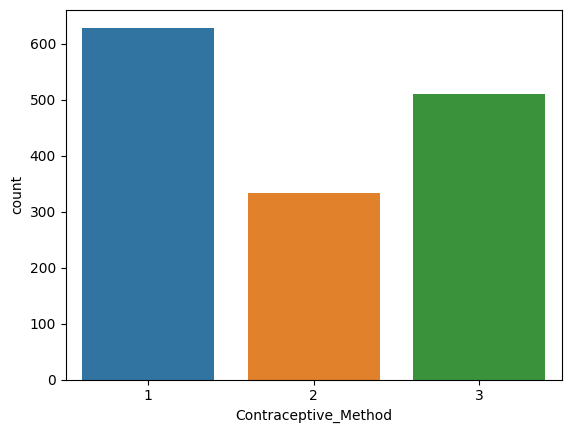

In [ ]:
#verificando se o dataset está balanceado
sns.countplot(x = df["Contraceptive_Method"])

Como podemos ver, está balanceado

In [ ]:
#agora vamos checkar se temos algum valor faltando para correção
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Wife_age              1473 non-null   int64
 1   Wife_education        1473 non-null   int64
 2   Husband_education     1473 non-null   int64
 3   Num_Born_Kids         1473 non-null   int64
 4   Wife_religion         1473 non-null   int64
 5   Wife_working          1473 non-null   int64
 6   Husband_occupation    1473 non-null   int64
 7   Std_Living_idx        1473 non-null   int64
 8   Media_Exposure        1473 non-null   int64
 9   Contraceptive_Method  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


Podemos ver que todas as features possuem 1473 valores não nulos, ou seja, todos estão preenchidos.

Também podemos verificar contando quantos nulos cada coluna tem, sendo 0

In [ ]:
df.isnull().sum()

Wife_age                0
Wife_education          0
Husband_education       0
Num_Born_Kids           0
Wife_religion           0
Wife_working            0
Husband_occupation      0
Std_Living_idx          0
Media_Exposure          0
Contraceptive_Method    0
dtype: int64

Agora faremos uma análise das variáveis relevantes para a escolha do método contraceptivo

In [ ]:
#separando a variavel target do resto
y = df["Contraceptive_Method"]
X = df.drop("Contraceptive_Method", axis = 1)

In [ ]:
#aplicando a técnica do qui quadrado para identificar as melhores features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#juntando nossas informações
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(9,'Score'))

                Specs       Score
0            Wife_age  132.680281
1      Wife_education   45.646138
3       Num_Born_Kids   45.128054
8      Media_Exposure   29.235977
7      Std_Living_idx   18.399817
6  Husband_occupation   18.136128
2   Husband_education    9.483911
4       Wife_religion    3.229343
5        Wife_working    1.299431


Como há uma grande diferença entre a relevância dos 4 primeiros atributos para os demais, ficaremos os os 4 primeiros

---



In [ ]:
columns_to_keep = ['Wife_age', 'Num_Born_Kids', 'Wife_education', 'Media_Exposure']
X = X[columns_to_keep]

<Axes: xlabel='Wife_age', ylabel='count'>

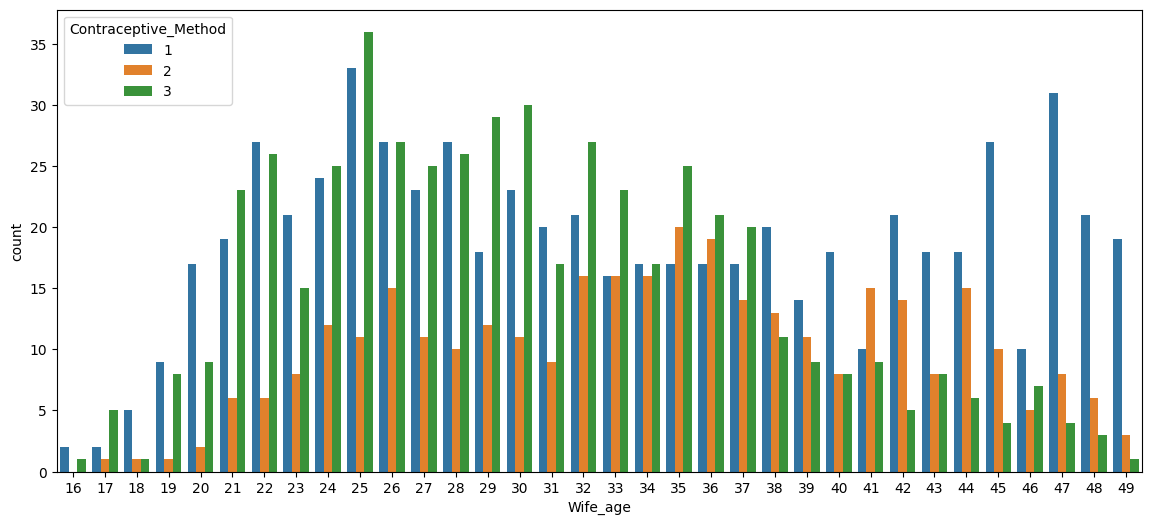

In [ ]:
#plotando o método escolhido pela idade da mulher
plt.figure(figsize=(14,6))
sns.countplot(x='Wife_age',data=df,hue="Contraceptive_Method")

<Axes: xlabel='Wife_education', ylabel='count'>

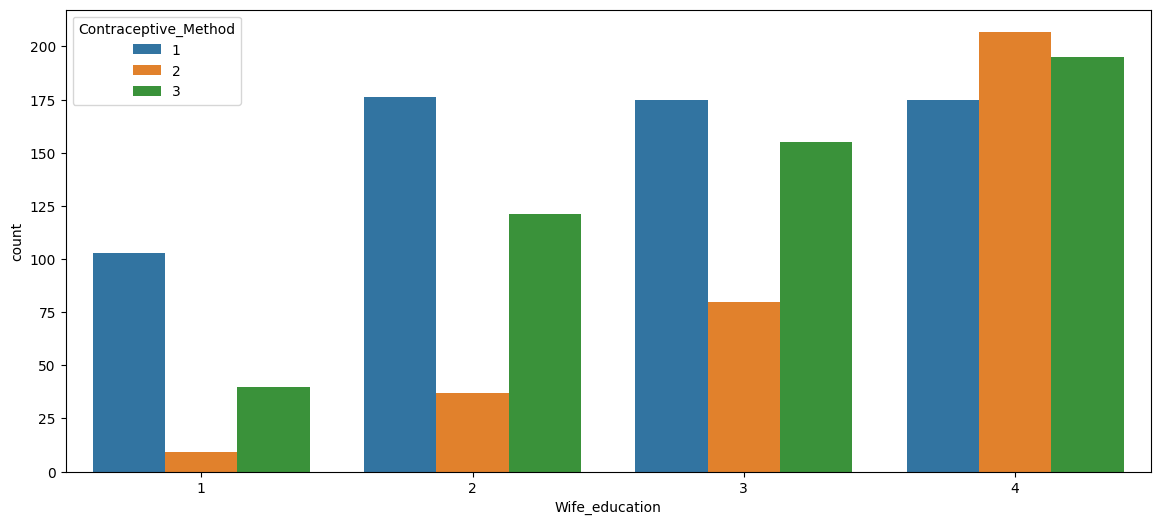

In [ ]:
#plotando o método escolhido pelo grau de educação da esposa
plt.figure(figsize=(14,6))
sns.countplot(x='Wife_education',data=df,hue="Contraceptive_Method")

<Axes: xlabel='Num_Born_Kids', ylabel='count'>

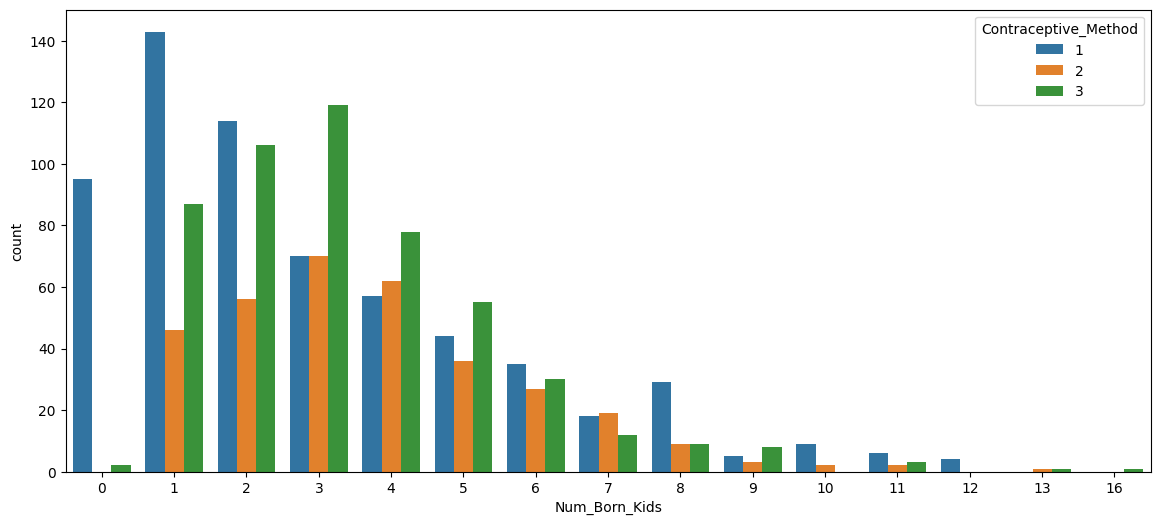

In [ ]:
#plotando o método escolhido pelo número de filhos
plt.figure(figsize=(14,6))
sns.countplot(x='Num_Born_Kids',data=df,hue="Contraceptive_Method")

<Axes: xlabel='Media_Exposure', ylabel='count'>

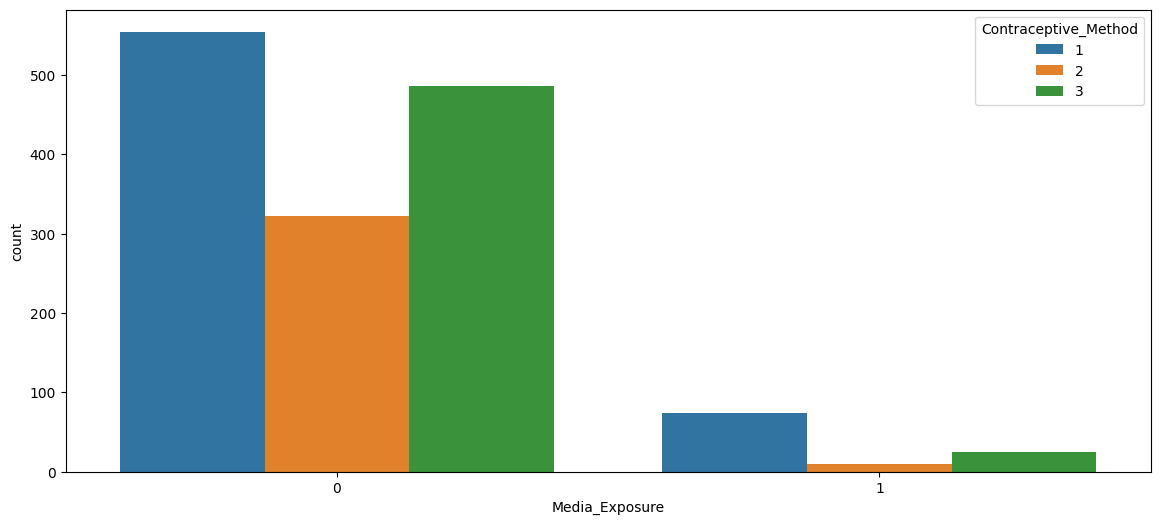

In [ ]:
#plotando o método escolhido pela exposição à mídia
plt.figure(figsize=(14,6))
sns.countplot(x='Media_Exposure',data=df,hue="Contraceptive_Method")

#Feature Engineering

Agora vamos transformar nossos dados contínuos em categóricos para aplicarmos o Categorical Naive Bayes

In [ ]:
#categorizando a idade em 3 faixas etárias
for i in range(1473):
  if X.Wife_age[i] >= 16 and X.Wife_age[i] < 27 :
    X.Wife_age[i] = 1
  elif X.Wife_age[i] >= 27 and X.Wife_age[i] < 38 :
    X.Wife_age[i] = 2
  else:
    X.Wife_age[i] = 3

In [ ]:
#categorizando o numero de filhos em 0, 1, 2, 3 e 4 ou mais
for i in range(1473):
  if X.Num_Born_Kids[i] >= 4:
    X.Num_Born_Kids[i] = 5
  else:
    X.Num_Born_Kids[i] +=1

#Aplicação do Naive Bayes

In [ ]:
#Separando o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=None)

In [ ]:
#Treinando o algoritmo
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB()

In [ ]:
#Realizando o teste
y_pred = clf.predict(X_test)

#Resultados

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5728813559322034
Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.64      0.66       132
           2       0.55      0.36      0.43        64
           3       0.47      0.63      0.54        99

    accuracy                           0.57       295
   macro avg       0.57      0.54      0.54       295
weighted avg       0.59      0.57      0.57       295



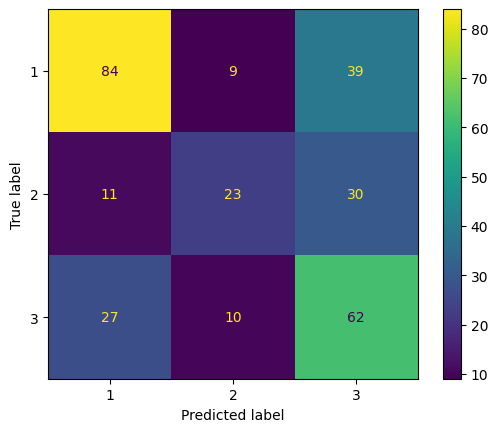

In [ ]:
labels = [1,2,3]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();